In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [183]:
FI_matrix = pd.read_csv('FI_across_iterations.csv', index_col=0, delimiter=';')
FI_matrix = FI_matrix.T
FI_matrix

FI,RF_SG_msi,XGB_SG_msi,RF_SG_stage,XGB_SG_stage,RF_SG_TL,XGB_SG_TL,RF_TCGA_ST,XGB_TCGA_ST,RF_FMG_HC,XGB_FMG_HC,RF_FMG_stage,XGB_FMG_stage,RF_FMG_TL,XGB_FMG_TL
1,g_Achromobacter,g_Ramlibacter,g_Cloacibacillus,g_Cloacibacillus,g_Turicimonas,g_Segatella,g_Faecalibacterium,g_Kangiella,g_Peptostreptococcus,g_Gelria,g_Parvimonas,g_Psychroflexus,g_Cosenzaea,g_Saccharibacillus
2,g_Akkermansia,g_Proteus,g_Odoribacter,g_Simiaoa,g_Sutterella,g_Gemella,g_Agrobacterium,g_Marinospirillum,g_Lachnospira,g_Simplicispira,g_Peptostreptococcus,g_Geofilum,g_Orbus,g_Orbus
3,g_Proteus,g_Limnohabitans,g_Anaerotignum,g_Oscillibacter,g_Anaerostipes,g_Enterocloster,g_Parabacteroides,g_Parabacteroides,g_Lactobacillus,g_Rufibacter,g_Bifidobacterium,g_Phocoenobacter,g_Malikia,g_Phaseolibacter
4,g_Peptoniphilus,g_Peptoniphilus,g_Barnesiella,g_Paraprevotella,g_Selenomonas,g_Flavonifractor,g_Dorea,g_Dorea,g_Centipeda,g_Meniscus,g_Phascolarctobacterium,g_Owenweeksia,g_Lachnospira,g_Cosenzaea
5,g_Treponema,g_Klebsiella,g_Oscillibacter,g_Odoribacter,g_Peptoniphilus,g_Mogibacterium,g_Solobacterium,g_Alkanindiges,g_Solobacterium,g_Streptosporangium,g_Anaerofustis,g_Volucribacter,g_Catonella,g_Eikenella
6,g_Duodenibacillus,g_Lachnoanaerobaculum,g_Porphyromonas,g_Sphaerotilus,g_Akkermansia,g_Caproicibacterium,g_Roseburia,g_Amantichitinum,g_Zhizhongheella,g_Mariniphaga,g_Lactovum,g_Providencia,g_Desulfoconvexum,g_Cricetibacter
7,g_Leptotrichia,g_Rhodoluna,g_Chakrabartyella,g_Azospirillum,g_Agathobacter,g_Desulfovibrio,g_Coprococcus,g_Listeria,g_Vitreoscilla,g_Tahibacter,g_Syntrophococcus,g_Coenonia,g_Cricetibacter,g_Salinirepens
8,g_Selenomonas,g_Achromobacter,g_Paraprevotella,g_Anaerotignum,g_Blautia,g_Akkermansia,g_Alkalibacterium,g_Agrobacterium,g_Vogesella,g_Sediminitomix,g_Sphingobacterium,g_Pelistega,g_Dolosicoccus,g_Paucimonas
9,g_Hydrogenophaga,g_Hydrogenophaga,g_Pusillibacter,g_Aquitalea,g_Vescimonas,g_Mycolicibacterium,g_Prevotella,g_Grimontia,g_Romboutsia,g_Atopobium,g_Bombiscardovia,g_Thermoanaerobacterium,g_Tamlicoccus,g_Chthonomonas
10,g_Rhodoluna,g_Parabacteroides,g_Emergencia,g_Roseburia,g_Anaerocolumna,g_Ligilactobacillus,g_Listeria,g_Paeniclostridium,g_Atopobium,g_Leptotrichia,g_Geofilum,g_Chitinivibrio,g_Eikenella,g_Yimella


In [184]:
# Melt the DataFrame to have a single column of microbe names
melted_df = FI_matrix.melt(value_name='microbe', var_name='model')

# Count occurrences of each microbe
microbe_counts = melted_df['microbe'].value_counts()

In [185]:
# Filter out microbes that occur only once
microbes_to_keep = microbe_counts[microbe_counts > 1].index

# Filter the original DataFrame
filtered_df = FI_matrix.applymap(lambda x: x if x in microbes_to_keep else None)

filtered_df

C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_24940\2470248388.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


FI,RF_SG_msi,XGB_SG_msi,RF_SG_stage,XGB_SG_stage,RF_SG_TL,XGB_SG_TL,RF_TCGA_ST,XGB_TCGA_ST,RF_FMG_HC,XGB_FMG_HC,RF_FMG_stage,XGB_FMG_stage,RF_FMG_TL,XGB_FMG_TL
1,g_Achromobacter,None,g_Cloacibacillus,g_Cloacibacillus,None,g_Segatella,g_Faecalibacterium,g_Kangiella,g_Peptostreptococcus,None,g_Parvimonas,None,g_Cosenzaea,None
2,g_Akkermansia,g_Proteus,g_Odoribacter,None,g_Sutterella,None,g_Agrobacterium,None,g_Lachnospira,None,g_Peptostreptococcus,g_Geofilum,g_Orbus,g_Orbus
3,g_Proteus,g_Limnohabitans,g_Anaerotignum,g_Oscillibacter,g_Anaerostipes,None,g_Parabacteroides,g_Parabacteroides,g_Lactobacillus,None,None,None,None,None
4,g_Peptoniphilus,g_Peptoniphilus,None,g_Paraprevotella,g_Selenomonas,None,g_Dorea,g_Dorea,None,None,None,None,g_Lachnospira,g_Cosenzaea
5,g_Treponema,g_Klebsiella,g_Oscillibacter,g_Odoribacter,g_Peptoniphilus,g_Mogibacterium,g_Solobacterium,None,g_Solobacterium,None,None,None,None,g_Eikenella
6,None,g_Lachnoanaerobaculum,g_Porphyromonas,None,g_Akkermansia,g_Caproicibacterium,g_Roseburia,None,g_Zhizhongheella,None,None,None,g_Desulfoconvexum,g_Cricetibacter
7,g_Leptotrichia,g_Rhodoluna,g_Chakrabartyella,None,g_Agathobacter,g_Desulfovibrio,g_Coprococcus,g_Listeria,None,g_Tahibacter,None,None,g_Cricetibacter,None
8,g_Selenomonas,g_Achromobacter,g_Paraprevotella,g_Anaerotignum,None,g_Akkermansia,None,g_Agrobacterium,None,None,None,None,None,None
9,g_Hydrogenophaga,g_Hydrogenophaga,g_Pusillibacter,None,g_Vescimonas,None,g_Prevotella,None,g_Romboutsia,g_Atopobium,g_Bombiscardovia,None,None,None
10,g_Rhodoluna,g_Parabacteroides,g_Emergencia,g_Roseburia,None,None,g_Listeria,None,g_Atopobium,g_Leptotrichia,g_Geofilum,None,g_Eikenella,None


In [186]:
importance_mapping_df = filtered_df.stack().reset_index()
importance_mapping_df.columns = ['importance', 'model', 'microbe']

# Create a reverse mapping from microbes to their importance values
reverse_importance_mapping = importance_mapping_df.set_index(['model', 'microbe'])['importance'].to_dict()

# Melt the DataFrame to have a single column of microbe names
melted_df = filtered_df.melt(value_name='microbe', var_name='model')

# Count occurrences of each microbe
microbe_counts = melted_df['microbe'].value_counts()

# Filter out microbes that occur only once
filtered_microbe_counts = microbe_counts[microbe_counts > 1]

# Convert the filtered counts to a DataFrame for better readability
ranked_microbes = filtered_microbe_counts.reset_index()
ranked_microbes.columns = ['microbe', 'frequency']

# Sort the DataFrame by frequency in descending order
ranked_microbes = ranked_microbes.sort_values(by='frequency', ascending=False)

# Initialize a new DataFrame with microbe names as index and model names as columns
ranked_microbe_list = ranked_microbes['microbe']
result_df = pd.DataFrame(index=ranked_microbe_list, columns=filtered_df.columns)

# Populate the DataFrame with feature importance values
for model in filtered_df.columns:
    model_microbes = filtered_df[model]
    for microbe in model_microbes:
        if (model, microbe) in reverse_importance_mapping:
            result_df.loc[microbe, model] = reverse_importance_mapping[(model, microbe)]

result_df = result_df.where(pd.notnull(result_df), None)
result_df

FI,RF_SG_msi,XGB_SG_msi,RF_SG_stage,XGB_SG_stage,RF_SG_TL,XGB_SG_TL,RF_TCGA_ST,XGB_TCGA_ST,RF_FMG_HC,XGB_FMG_HC,RF_FMG_stage,XGB_FMG_stage,RF_FMG_TL,XGB_FMG_TL
microbe,,,,,,,,,,,,,,
g_Porphyromonas,None,None,6,18,20,18,None,None,None,None,13,None,None,None
g_Lachnospira,None,None,16,None,None,16,None,None,2,None,None,None,4,None
g_Selenomonas,8,16,None,None,4,None,None,None,13,None,None,None,None,None
g_Akkermansia,2,13,None,None,6,8,None,None,None,None,None,None,None,None
g_Vescimonas,None,17,None,17,9,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g_Dorea,None,None,None,None,None,None,4,4,None,None,None,None,None,None
g_Bombiscardovia,None,None,None,None,None,None,None,None,None,None,9,19,None,None
g_Cosenzaea,None,None,None,None,None,None,None,None,None,None,None,None,1,4


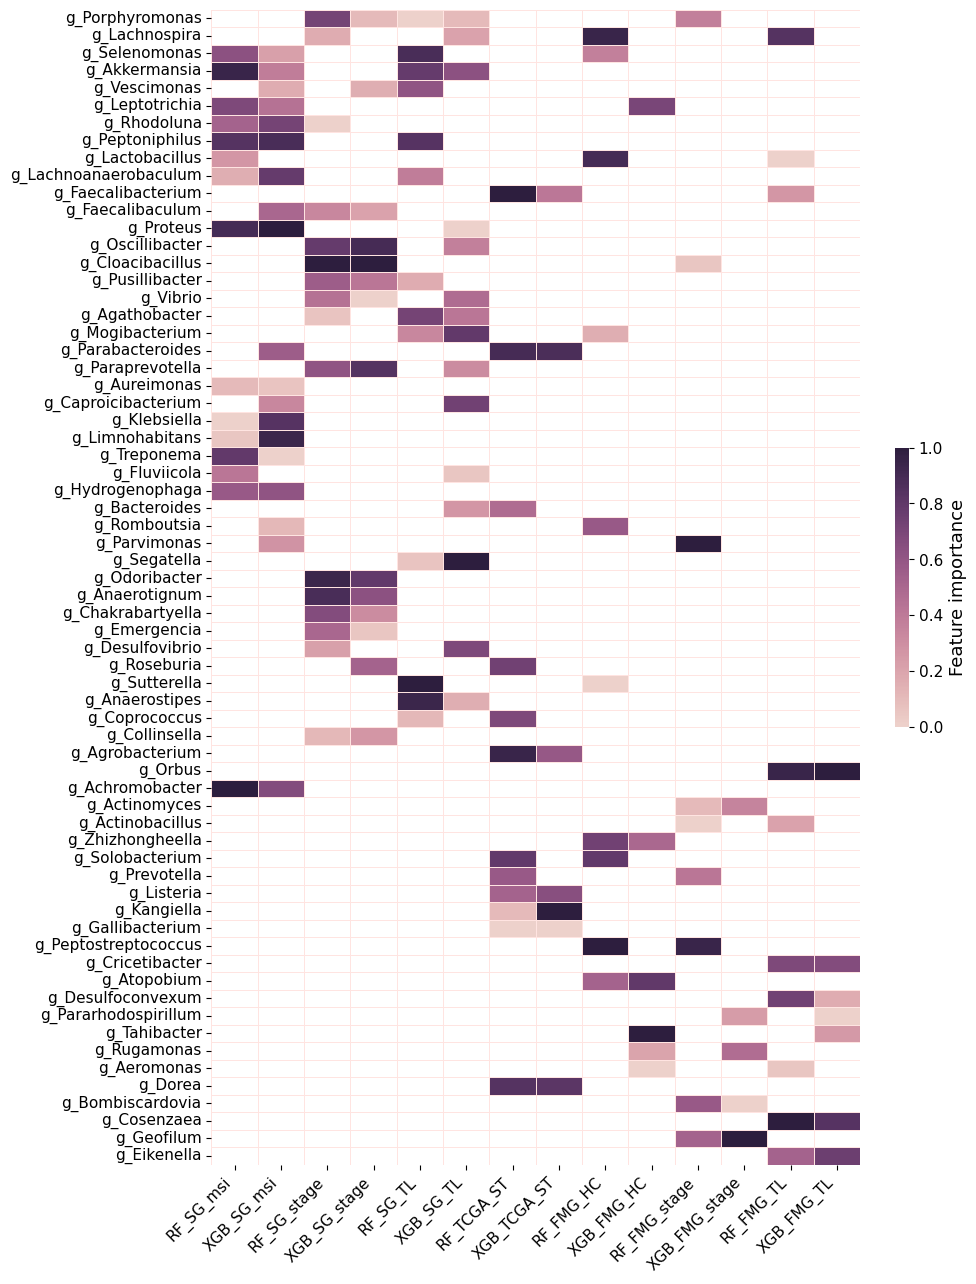

In [190]:
from sklearn.preprocessing import MinMaxScaler

# Convert all values to numeric and handle NaN
result_df = result_df.apply(pd.to_numeric, errors='coerce')
#result_df.fillna(0, inplace=True)  # Replace NaN with 0 for scaling

# Apply Min-Max Scaling and invert the result
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(result_df)
inverted_scaled_df = 1 - scaled_df  # Inverting the scaled values

# Convert to DataFrame
normalized_df = pd.DataFrame(inverted_scaled_df, index=result_df.index, columns=result_df.columns)


# Fill NaN values with 0 if necessary
#normalized_df = normalized_df.fillna(0)

# Create a heatmap with broader lines between cells
plt.figure(figsize=(9, 15))
cmap = sns.cubehelix_palette(as_cmap=True)
heatmap = sns.heatmap(normalized_df, annot=False, cmap=cmap, 
                      cbar_kws={'label': 'Feature importance', 'fraction': 0.02, 'pad': 0.05},
                      linewidths=0.5, linecolor='mistyrose')
# Adjust the color bar label size
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Feature importance', fontsize=13)  # Change 'fontsize' to your desired size

# Optionally adjust the tick label size if needed
colorbar.ax.tick_params(labelsize=11)

plt.xlabel('')
plt.ylabel('')
plt.title('')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Display the heatmap
plt.show()

In [191]:
print(result_df.index)

Index(['g_Porphyromonas', 'g_Lachnospira', 'g_Selenomonas', 'g_Akkermansia',
       'g_Vescimonas', 'g_Leptotrichia', 'g_Rhodoluna', 'g_Peptoniphilus',
       'g_Lactobacillus', 'g_Lachnoanaerobaculum', 'g_Faecalibacterium',
       'g_Faecalibaculum', 'g_Proteus', 'g_Oscillibacter', 'g_Cloacibacillus',
       'g_Pusillibacter', 'g_Vibrio', 'g_Agathobacter', 'g_Mogibacterium',
       'g_Parabacteroides', 'g_Paraprevotella', 'g_Aureimonas',
       'g_Caproicibacterium', 'g_Klebsiella', 'g_Limnohabitans', 'g_Treponema',
       'g_Fluviicola', 'g_Hydrogenophaga', 'g_Bacteroides', 'g_Romboutsia',
       'g_Parvimonas', 'g_Segatella', 'g_Odoribacter', 'g_Anaerotignum',
       'g_Chakrabartyella', 'g_Emergencia', 'g_Desulfovibrio', 'g_Roseburia',
       'g_Sutterella', 'g_Anaerostipes', 'g_Coprococcus', 'g_Collinsella',
       'g_Agrobacterium', 'g_Orbus', 'g_Achromobacter', 'g_Actinomyces',
       'g_Actinobacillus', 'g_Zhizhongheella', 'g_Solobacterium',
       'g_Prevotella', 'g_Listeria',

In [192]:
normalized_df.columns

Index(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_TCGA_ST', 'XGB_TCGA_ST', 'RF_FMG_HC', 'XGB_FMG_HC',
       'RF_FMG_stage', 'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL'],
      dtype='object', name='FI')